#### Import dependencies

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

#### Random data for toy problem

In [2]:
a= np.random.normal(0,1,2000).reshape(2000,1)
b = np.ones((2000,2))

for i in range(2000):
    b[i][0] = a[i]
    b[i][1] = a[i]*2  + np.random.normal()


In [3]:
df = pandas.DataFrame(b, columns = ['X','Y'])
df

,X,Y
0,0.623948,0.731502
1,-1.405083,-1.919281
2,-0.182268,-0.167510
3,-0.336580,-1.716161
4,1.480660,1.733938
...,...,...
1995,-1.538802,-3.234821
1996,1.054194,2.100876
1997,0.914434,2.092558
1998,-0.563204,0.479347


#### Normalize X data

In [4]:
yield_column = df.loc[:, df.columns == 'Y'] 
del df['Y']
normalized_df = (df-df.mean())/df.std()
normalized_df = pandas.merge(normalized_df, yield_column, left_index=True, right_index=True)
normalized_df

,X,Y
0,0.653828,0.731502
1,-1.381475,-1.919281
2,-0.154880,-0.167510
3,-0.309669,-1.716161
4,1.513189,1.733938
...,...,...
1995,-1.515608,-3.234821
1996,1.085404,2.100876
1997,0.945212,2.092558
1998,-0.536994,0.479347


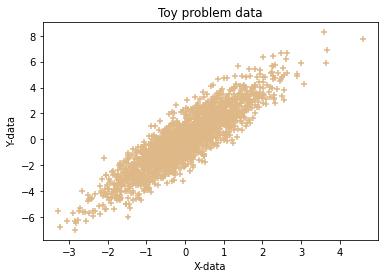

In [5]:
plt.scatter('X','Y',data =normalized_df, marker = '+', color = 'burlywood')
plt.ylabel('Y-data')
plt.xlabel('X-data')
plt.title('Toy problem data')
plt.show()

In [6]:
def mse(y_pred,y_test):
    '''Returns the mean squared error given two numpy arrays'''
    sum_squared_error = np.sum(np.square(y_test - y_pred))
    m_s_e = sum_squared_error/len(y_pred)
    return m_s_e




In [7]:
# Split the data into 60%-40% for train/test
split = int(len(df)*0.6)
data = np.array(normalized_df)
np.random.seed(0)
shuffle = np.random.permutation(len(data))


In [8]:
def knn_predictions(xTrain,yTrain,xTest,k=3):
   
    indices, distances = knn(xTrain,xTest,k)
    yTrain = yTrain.flatten()
    rows, columns = indices.shape
    predictions = list()
    for j in range(columns):
        temp = list()
        for i in range(rows):
            cell = indices[i][j]
            temp.append(yTrain[cell])
        predictions.append(max(temp,key=temp.count)) #this is the key function, brings the mode value
    predictions=np.array(predictions)
    return predictions

In [9]:
def knn(xTrain, xTest, k):
 
    #the following formula calculates the Euclidean distances.
    distances = -2 * xTrain@xTest.T + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis]

    distances[distances < 0] = 0
    
    distances = distances**.5
    indices = np.argsort(distances, 0) #get indices of sorted items
    distances = np.sort(distances,0) #distances sorted in axis 0
    #returning the top-k closest distances.
    return indices[0:k, : ], distances[0:k, : ]

In [10]:
x_knn = normalized_df.iloc[:,:-1].to_numpy()
y_knn = normalized_df.iloc[:,-1].to_numpy()
x_knn = x_knn[shuffle]
y_knn = y_knn[shuffle]
x_train_knn= x_knn[:split]
y_train_knn = y_knn[:split]

x_test_knn = x_knn[split:]
y_test_knn = y_knn[split:]

In [11]:
y_pred_knn = knn_predictions(x_train_knn,y_train_knn,x_test_knn,k=4)
print("The mean squared error for the Κnn toy problem is {}".format(mse(y_pred_knn,y_test_knn)))

The mean squared error for the Κnn toy problem is 1.9709045830318852


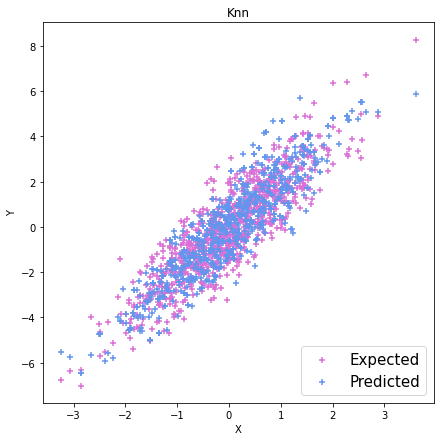

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(x_test_knn,y_test_knn,color = 'orchid',marker = '+')
plt.scatter(x_test_knn,y_pred_knn,color = 'cornflowerblue',marker = '+')
plt.title('Knn')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend(["Expected", "Predicted"], loc ="lower right",prop={'size': 15} )